In [2]:
#Exercise 1  
#a) Import the posted Excel file, Washington_Health_Workforce_Survey_Data.xls 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.chdir('/Users/kristilia1/Desktop')
cwd = os.getcwd()
cwd

dataframe1 = pd.read_excel('Washington_Health_Workforce_Survey_Data.xls')
dataframe1.head()

,ABMSCertified,AcceptedPaymentMethods,ACGMEAccreditation,ActiveCredentialOtherState,AmericanIndianAlaskaNativeRace,AnnualWeeksWorked,AOAAccreditation,AOACertified,AsianRace,AudiologyAssistantEducation,...,ThirdPracticeStreetAddress2,ThirdPracticeZip,UnspervisedPracticeLocationType,VolunteerHoursAdministration,VolunteerHoursEducation,VolunteerHoursOther,VolunteerHoursPatientCareInState,VolunteerHoursPatientOutState,VolunteerHoursResearch,WorkStatus
0,NaN,NaN,NaN,0.0,NaN,17.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,NaN,46.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,NaN,NaN,NaN,0.0,NaN,50.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [3]:
#b.1) Calculate and interpret a correlation measure for 'NumberYearsPracticeWashington' and 'BirthYear' variables, what does the result indicate?
dataframe1[["NumberYearsPracticeWashington","BirthYear"]].corr()
#There two variables are negatively correlated: the higher the birth year (i.e. a person is younger) the lower the number of years of practice in Washington
#However, the correlation (approximately -0.6) is not very strong 

,NumberYearsPracticeWashington,BirthYear
NumberYearsPracticeWashington,1.000000,-0.587643
BirthYear,-0.587643,1.000000


In [4]:
#b.2) Impute the missing values for the 'AnnualWeeksWorked' variable by the median.
median = dataframe1["AnnualWeeksWorked"].median()
print ("The median is", median)
dataframe1["AnnualWeeksWorked"].fillna(median, inplace=True)
dataframe1["AnnualWeeksWorked"]

The median is 48.0


0        17.0
1         0.0
2        50.0
3        46.0
4        50.0
5        40.0
6        50.0
7        30.0
8        24.0
9         1.0
10       25.0
11       40.0
12       36.0
13       52.0
14       52.0
15       42.0
16        8.0
17       50.0
18       48.0
19       48.0
20       50.0
21       40.0
22       25.0
23        0.0
24       52.0
25       30.0
26       40.0
27       52.0
28       51.0
29       50.0
         ... 
25255     0.0
25256     0.0
25257    49.0
25258    48.0
25259    50.0
25260     1.0
25261    50.0
25262    48.0
25263     0.0
25264     4.0
25265    50.0
25266    12.0
25267    50.0
25268    50.0
25269    48.0
25270    52.0
25271    52.0
25272    50.0
25273    30.0
25274    10.0
25275     5.0
25276    50.0
25277    50.0
25278     0.0
25279    48.0
25280    50.0
25281    50.0
25282    50.0
25283    48.0
25284    50.0
Name: AnnualWeeksWorked, Length: 25285, dtype: float64

In [5]:
#b.3) Calculate the mean for the 'AnnualWeeksWorked' variable (after the imputation)
mean = dataframe1["AnnualWeeksWorked"].mean()
mean

39.29867233537671

In [6]:
#c) Compute the same statistics (mean and median) of 'AnnualWeeksWorked' variable' for male and females separately.
#For men
datamen = dataframe1[dataframe1["Sex"] == "Male"]
meanmen = datamen["AnnualWeeksWorked"].mean()
medianmen = datamen["AnnualWeeksWorked"].median()
print("median", medianmen, "mean", meanmen)
#len(datamen["AnnualWeeksWorked"])

median 48.0 mean 40.48503591380686


7518

In [7]:
#For women
datawomen = dataframe1[dataframe1["Sex"] == "Female"]
meanwomen = datawomen["AnnualWeeksWorked"].mean()
medianwomen = datawomen["AnnualWeeksWorked"].median()
print("median", medianwomen, "mean", meanwomen)
#len(datawomen["AnnualWeeksWorked"])

median 48.0 mean 38.668536261962416


17346

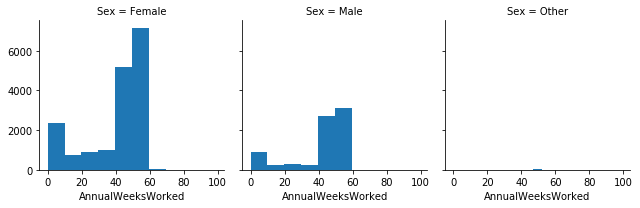

In [42]:
#d) Using seaborn package, develop an informative visualization of the distribution of the 'AnnualWeeksWorked' for males and females.

g = sns.FacetGrid(dataframe1, col="Sex")
g.map(plt.hist, "AnnualWeeksWorked")

#This visualization shows that women have a larger sample, however the distribution is quite similar
#This explained by the data statistics, since two sample have the same median and the means not too far apart

In [8]:
#Exercise 2
#Develop and code a word parsing program which replaces certain grammatical elements in a phrase with user input

#Print initial sentence 
phrase = 'The octopus snagged the blue fish'
subject = phrase.split()[1:2][0]
verb = phrase.split()[2:3][0]
adjective = phrase.split()[4:5][0]
obj = phrase.split()[5:6][0]
sentence = "The " + subject + (' ') + verb + " the " + adjective  + (' ') + obj
print(sentence)

#Request new words
subject = input('What is the new subject? :')
verb = input('What is the new verb? :')
adjective = input('What is the new adjective? :')
obj = input('What is the new obj? :')
sentence = "The " + subject + (' ') + verb + " the " + adjective  + (' ') + obj
print(sentence)


The octopus snagged the blue fish
What is the new subject? :shark
What is the new verb? :ate
What is the new adjective? :huge
What is the new obj? :tuna
The shark ate the huge tuna


In [3]:
#Exercise 3
from random import randint
random = randint(1, 100)
print("The random number is ", random)


s = list(range(1, 101))
middle = s[int(len(s)/2)-1]


while (middle > 0 ):
    print("Guess: ", middle)
    review = input('Is it too high/too low/just right? :')
    print(review)
    if review == 'too high':       
        middle = middle - 1
        
    if review == 'too low':
        middle = middle + 1
        
    if review == "just right":
        print ("good job!")
        break

The random number is  66
Guess:  50
Is it too high/too low/just right? :too low
too low
Guess:  51
Is it too high/too low/just right? :too low
too low
Guess:  52
Is it too high/too low/just right? :too low
too low
Guess:  53
Is it too high/too low/just right? :too low
too low
Guess:  54
Is it too high/too low/just right? :too low
too low
Guess:  55
Is it too high/too low/just right? :too low
too low
Guess:  56
Is it too high/too low/just right? :too low
too low
Guess:  57
Is it too high/too low/just right? :too low
too low
Guess:  58
Is it too high/too low/just right? :too low
too low
Guess:  59
Is it too high/too low/just right? :too low
too low
Guess:  60
Is it too high/too low/just right? :too low
too low
Guess:  61
Is it too high/too low/just right? :too low
too low
Guess:  62
Is it too high/too low/just right? :too low
too low
Guess:  63
Is it too high/too low/just right? :too low
too low
Guess:  64
Is it too high/too low/just right? :too low
too low
Guess:  65
Is it too high/too 